In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import LabelEncoder;
import seaborn as sns;

In [2]:
%matplotlib inline

In [3]:
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [4]:
list(training_set)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
training_set.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
training_set.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Miss. Margaret Edith",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
training_set[['Pclass','Survived']].groupby(by =['Pclass'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
training_set[['Sex','Survived']].groupby(by =['Sex'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
s = training_set.groupby(pd.cut(training_set['Age'], bins=20))['Survived'].value_counts()
print(s)

Age               Survived
(0.34, 4.399]     1           27
                  0           13
(4.399, 8.378]    1            9
                  0            5
(8.378, 12.357]   0           11
                  1            4
(12.357, 16.336]  0           16
                  1           15
(16.336, 20.315]  0           52
                  1           27
(20.315, 24.294]  0           62
                  1           36
(24.294, 28.273]  0           55
                  1           30
(28.273, 32.252]  0           49
                  1           35
(32.252, 36.231]  0           38
                  1           35
(36.231, 40.21]   0           28
                  1           17
(40.21, 44.189]   0           23
                  1           12
(44.189, 48.168]  0           23
                  1           12
(48.168, 52.147]  0           15
                  1           14
(52.147, 56.126]  0            9
                  1            7
(56.126, 60.105]  0            8
                

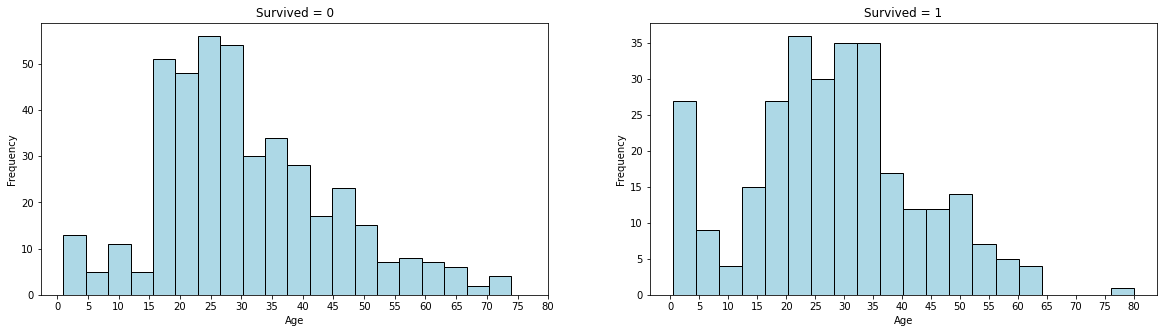

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,5))
training_set[training_set['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='lightblue')
ax[0].set_title('Survived = 0')
ax[0].set_xlabel('Age')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
training_set[training_set['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='lightblue')
ax[1].set_title('Survived = 1')
ax[1].set_xlabel('Age')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

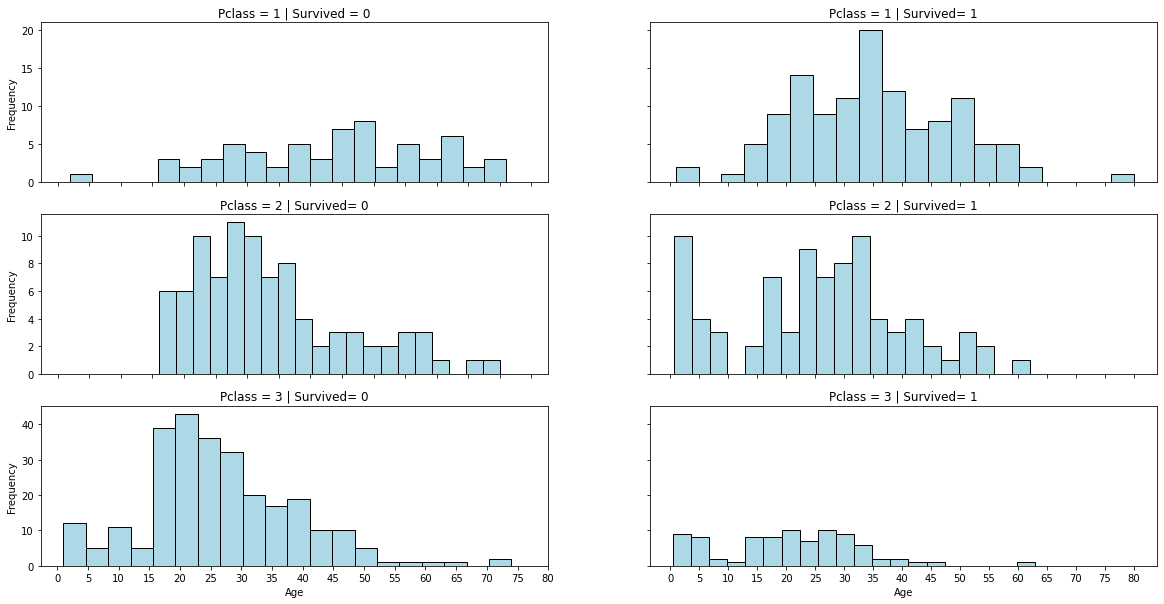

In [15]:

f,ax=plt.subplots(3, 2, sharex='col', sharey='row',figsize=(20,10))
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 0].loc[lambda training_set: training_set.Pclass == 1]
training_set_filtered.Age.plot.hist(ax=ax[0,0],bins=20,edgecolor='black',color='lightblue')
ax[0,0].set_title('Pclass = 1 | Survived = 0')
ax[0,0].set_xlabel('Age')
x1=list(range(0,85,5))
ax[0,0].set_xticks(x1)
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 1].loc[lambda training_set: training_set.Pclass == 1]
training_set_filtered.Age.plot.hist(ax=ax[0,1],bins=20,edgecolor='black',color='lightblue')
ax[0,1].set_title('Pclass = 1 | Survived= 1')
ax[0,1].set_xlabel('Age')
x2=list(range(0,85,5))
ax[0,1].set_xticks(x2)
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 0].loc[lambda training_set: training_set.Pclass == 2]
training_set_filtered.Age.plot.hist(ax=ax[1,0],bins=20,edgecolor='black',color='lightblue')
ax[1,0].set_title('Pclass = 2 | Survived= 0')
ax[1,0].set_xlabel('Age')
x3=list(range(0,85,5))
ax[1,0].set_xticks(x3)
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 1].loc[lambda training_set: training_set.Pclass == 2]
training_set_filtered.Age.plot.hist(ax=ax[1,1],bins=20,edgecolor='black',color='lightblue')
ax[1,1].set_title('Pclass = 2 | Survived= 1')
ax[1,1].set_xlabel('Age')
x4=list(range(0,85,5))
ax[1,1].set_xticks(x4)
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 0].loc[lambda training_set: training_set.Pclass == 3]
training_set_filtered.Age.plot.hist(ax=ax[2,0],bins=20,edgecolor='black',color='lightblue')
ax[2,0].set_title('Pclass = 3 | Survived= 0')
ax[2,0].set_xlabel('Age')
x5=list(range(0,85,5))
ax[2,0].set_xticks(x5)
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 1].loc[lambda training_set: training_set.Pclass == 3]
training_set_filtered.Age.plot.hist(ax=ax[2,1],bins=20,edgecolor='black',color='lightblue')
ax[2,1].set_title('Pclass = 3 | Survived= 1')
ax[2,1].set_xlabel('Age')
x6=list(range(0,85,5))
ax[2,1].set_xticks(x6) 
plt.show()

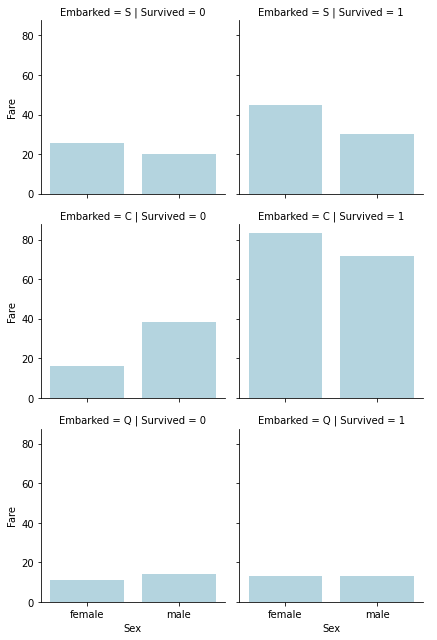

In [16]:
grid = sns.FacetGrid(training_set, row='Embarked', col='Survived', height=3, aspect=1)
grid.map(sns.barplot, 'Sex', 'Fare',  ci=None, order=['female','male'], color='lightblue')
grid.add_legend()

In [17]:
frequency = training_set['Ticket'].value_counts()
print(frequency)

CA. 2343             7
347082               7
1601                 7
CA 2144              6
3101295              6
                    ..
33638                1
28220                1
STON/O 2. 3101289    1
14313                1
693                  1
Name: Ticket, Length: 681, dtype: int64


In [18]:
frequency = test_set['Ticket'].value_counts()
print(frequency)

PC 17608      5
CA. 2343      4
113503        4
PC 17483      3
C.A. 31029    3
             ..
345763        1
239059        1
349226        1
19924         1
330971        1
Name: Ticket, Length: 363, dtype: int64


In [19]:
training_set = training_set.drop(['Ticket'], axis=1)
test_set = test_set.drop(['Ticket'], axis=1)

In [20]:
training_set['Cabin'].isnull().sum()

687

In [21]:
test_set['Cabin'].isnull().sum()

327

In [22]:
combine = [training_set, test_set]

In [23]:
combine[0]['Cabin'].isnull().sum() + combine[1]['Cabin'].isnull().sum()

1014

In [24]:
training_set = training_set.drop(['Cabin'], axis=1)
test_set = test_set.drop(['Cabin'], axis=1)

In [25]:
combine = [training_set, test_set]

In [26]:
le = LabelEncoder();

In [27]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [28]:
training_set['Sex']=le.fit_transform(training_set['Sex'])

In [29]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


In [30]:
mean = training_set['Age'].mean()
std = training_set['Age'].std()

print('The mean is : ', mean);
print('The Standard Deviation is : ', std);

def fill_missing_val(column_val):
    if np.isnan(column_val) == True: 
        column_val = np.random.randint(std, mean, 1)[0]
    else:
         column_val = column_val
    return column_val

combine[0]['Age'] = training_set['Age'].apply(fill_missing_val) 
combine[1]['Age'] = test_set['Age'].apply(fill_missing_val) 


The mean is :  29.69911764705882
The Standard Deviation is :  14.526497332334044


In [31]:
training_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,23.0,1,2,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,7.75,Q


In [32]:
training_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [33]:
training_set['Embarked'].mode()[0]

'S'

In [34]:
for column in training_set.columns:
    training_set['Embarked'].fillna(training_set['Embarked'].mode()[0], inplace=True)

In [35]:
training_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [36]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [37]:
for column in test_set.columns:
    test_set['Fare'].fillna(test_set['Fare'].mode()[0], inplace=True)

In [38]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [39]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


In [40]:
def conv_fare_to_ordinal(x):
    if x > -(0.001) and x <= 7.91:
        return 0
    elif x > 7.91 and x <= 14.4542:
        return 1
    elif x > 14.4542 and x <= 31.0:
        return 2
    elif x > 31.0 and x <= 512.3292:
        return 3
    
combine[0]['Fare'] = training_set.Fare.apply(conv_fare_to_ordinal)
combine[1]['Fare'] = test_set.Fare.apply(conv_fare_to_ordinal)

In [41]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,S


In [42]:
training_set[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=True)

,Fare,Survived
0,0,0.197309
1,1,0.303571
2,2,0.454955
3,3,0.581081


In [43]:
training_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,S
5,6,0,3,"Moran, Mr. James",1,17.0,0,0,1,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,3,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,2,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,1,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,2,C


In [44]:
test_set.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,1,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,1,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,1,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,1,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,0,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,2,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,0,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,2,S


In [45]:
training_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [46]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64